In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy import fft

from IPython.html import widgets

%matplotlib inline

## Face Detection by Haar Cascades
- the most famous cascade classifier based on AdaBoost
- the training phase can be ignored for "normal face" detection, details can be found at [Cascade Classifier Training](http://docs.opencv.org/doc/user_guide/ug_traincascade.html) and [finding bananas](http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html)
- the detection phase can be applied by creating a cascade classifier directly from a profile, [tutorial](http://docs.opencv.org/trunk/doc/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection)

In [2]:
!ls /usr/local/share/OpenCV/haarcascades/

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


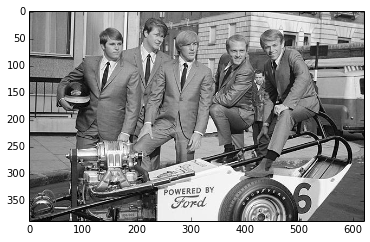

In [9]:
beachboys = cv2.imread("public-images/beachboys.jpg")[:,:,::-1]
gray = cv2.cvtColor(beachboys, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = plt.cm.gray)

In [10]:
face_detector = cv2.CascadeClassifier('/usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_alt2.xml')
faces = face_detector.detectMultiScale(gray, 1.02, 7)

In [11]:
faces

array([[413, 116,  22,  22],
       [220,  32,  39,  39],
       [141,  48,  39,  39],
       [280,  47,  41,  41],
       [428,  53,  38,  38],
       [365,  59,  41,  41]], dtype=int32)

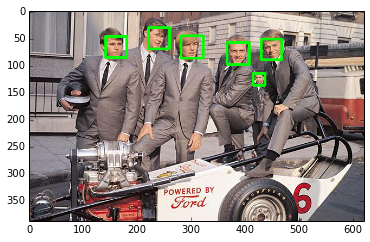

In [12]:
roi_img = beachboys.copy()
for face in faces:
    x, y, w, h = face
    roi_img = cv2.rectangle(roi_img, (x, y), (x+w, y+h), color = (0, 255, 0), thickness = 3)

plt.imshow(roi_img)

### parameters to detection
- scaleFactor: How much the image size is reduced at
each image scale. This value is used to create the
scale pyramid. In order to detect faces at multiple
scales in the image (some faces may be closer to the
foreground, and thus be larger, other faces may be
smaller and in the background, thus the usage of vary-
ing scales). A value of 1.05 indicates that the image is reduced by 5% at each level in
the pyramid.
- minNeighbors: How many neighbors each window
should have for the area in the window to be consid-
ered a face. The cascade classifier will detect multiple
windows around a face. This parameter controls how
many rectangles (neighbors) need to be detected for
the window to be labeled a face.
- minSize: A tuple of width and height (in pixels) in-
dicating the minimum size of the window. Bounding
boxes smaller than this size are ignored. It is a good
idea to start with (30, 30) and fine tune from there.

In [19]:
## live camera exmaple

camera = cv2.VideoCapture(0)
face_detector = cv2.CascadeClassifier("public-images/Mouth.xml")

while True:
    ret, frame = camera.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = face_detector.detectMultiScale(gray, 1.5, 20)
    for x, y, w, h in faces:
        frame = cv2.rectangle(frame, (x,y), (x+w, y+h), color = (0, 255, 0), thickness = 3)
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
camera.release()
cv2.destroyAllWindows()

In [15]:
## Mouth.xml is downloaded from http://alereimondo.no-ip.org/OpenCV/34


beachboys.jpg  clahe.png       fish.png     messi5.jpg	wiki.jpg
blue_rose.jpg  coins.jpg       j.png	    Mouth.xml
clahe.jpg      edge_noise.gif  marbles.jpg  sudoku.jpg
